# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 134 kB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 16.1 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 9.9 MB/s eta 0:00:01


In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
#transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.13066,), (0.30811,))])
transform = transforms.Compose([transforms.ToTensor()])

batch_d=100

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_data = torchvision.datasets.MNIST("./data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_d, 
                                           shuffle=True)


# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)
test_loader= torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_d,
                                          shuffle=False)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I choose to convert images to tensors in order to be handled by Dataloader. 
I chose to not useany other transformation since ToTensor include min-max normalization. Standardization with mean and standard deviation could be used to normalize data.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

DATA EXPLORATION
Images size: (28, 28)

TRAIN SET
Size of the train dataset: 60000
Min: 0 - Max: 255
Average: 33.32 - Standard deviation: 78.57
Normalized Average: 0.13066 - Normalized Standard deviation: 0.30811

TEST SET
Size of the test dataset: 10000
Min: 0 - Max: 255
Average: 33.79 - Standard deviation: 79.17
Normalized Average: 0.13251 - Normalized Standard deviation: 0.31048

7


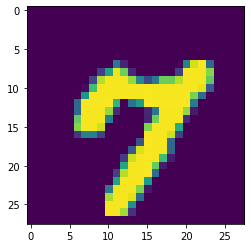

7


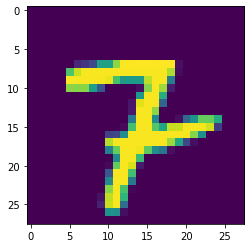

9


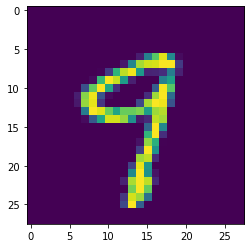

0


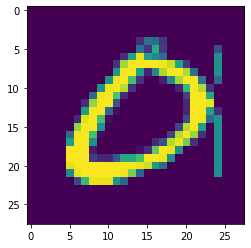

1


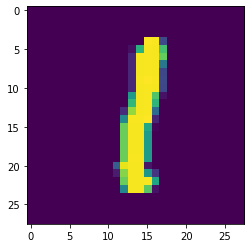

In [5]:
# Explore data
## YOUR CODE HERE ##
#Numpy array

train_data_np = train_data.data.numpy()
test_data_np = test_data.data.numpy()

print('DATA EXPLORATION')
print(f'Images size: {train_data_np[0].shape}')
print('')
print('TRAIN SET')
print(f'Size of the train dataset: {len(train_data_np)}')
print(f'Min: {train_data_np.min()} - Max: {train_data_np.max()}')
print(f'Average: {train_data_np.mean():.2f} - Standard deviation: {train_data_np.std():.2f}')
print(f'Normalized Average: {train_data_np.mean()/train_data_np.max():.5f} - Normalized Standard deviation: {train_data_np.std()/train_data_np.max():.5f}')

print('')
print('TEST SET')
print(f'Size of the test dataset: {len(test_data_np)}')
print(f'Min: {test_data_np.min()} - Max: {test_data_np.max()}')
print(f'Average: {test_data_np.mean():.2f} - Standard deviation: {test_data_np.std():.2f}')
print(f'Normalized Average: {test_data_np.mean()/test_data_np.max():.5f} - Normalized Standard deviation: {test_data_np.std()/test_data_np.max():.5f}')
print('')

#Plot of 5 images
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [6]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


Specify a loss function and an optimizer, and instantiate the model.
If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##

num_epochs = 20
train_loss_history = list()
train_accuracy_history=list()

val_loss_history = list()
val_accuracy_history=list()

for epoch in range(num_epochs):
    net = net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        optimizer.zero_grad()
        outputs =  net(inputs)
        loss =  criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)#check result,preds are index of row(label)
        train_correct += (preds == labels).sum().item()#add all True

        train_loss += loss.item()#errors
    print(f'Epoch {epoch + 1} training accuracy: {100*train_correct/len(train_loader.dataset):.2f}% training loss: {train_loss/len(train_loader.dataset):.5f}')
    # print(f'{train_correct}/{len(train_loader.dataset)}')
    train_loss_history.append(train_loss/len(train_loader.dataset))
    train_accuracy_history.append(train_correct/len(train_loader.dataset))
    
    val_loss = 0.0
    val_correct = 0
    net = net.eval()
    for i, data in enumerate(test_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {100*val_correct/len(test_loader.dataset):.2f}% validation loss: {val_loss/len(test_loader.dataset):.5f}')
    #print(f'{val_correct}/{len(test_loader.dataset)}')
    val_loss_history.append(val_loss/len(test_loader.dataset))
    val_accuracy_history.append(val_correct/len(test_loader.dataset))

Epoch 1 training accuracy: 90.47% training loss: 0.00343
Epoch 1 validation accuracy: 95.50% validation loss: 0.00154
Epoch 2 training accuracy: 95.85% training loss: 0.00138
Epoch 2 validation accuracy: 96.36% validation loss: 0.00116
Epoch 3 training accuracy: 97.22% training loss: 0.00092
Epoch 3 validation accuracy: 96.98% validation loss: 0.00091
Epoch 4 training accuracy: 97.78% training loss: 0.00071
Epoch 4 validation accuracy: 97.08% validation loss: 0.00085
Epoch 5 training accuracy: 98.41% training loss: 0.00053
Epoch 5 validation accuracy: 97.64% validation loss: 0.00075
Epoch 6 training accuracy: 98.65% training loss: 0.00043
Epoch 6 validation accuracy: 97.45% validation loss: 0.00079
Epoch 7 training accuracy: 98.81% training loss: 0.00036
Epoch 7 validation accuracy: 97.83% validation loss: 0.00076
Epoch 8 training accuracy: 99.11% training loss: 0.00029
Epoch 8 validation accuracy: 97.53% validation loss: 0.00085
Epoch 9 training accuracy: 99.25% training loss: 0.00023

Plot the training loss (and validation loss/accuracy, if recorded).

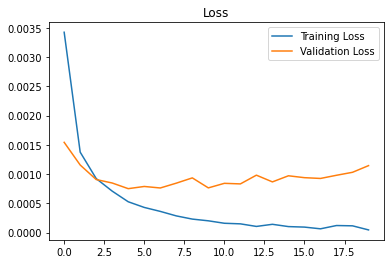

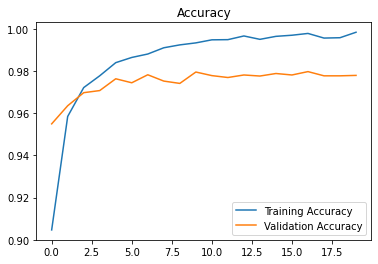

In [9]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.title("Loss")
plt.legend()
plt.show()

plt.plot(train_accuracy_history, label="Training Accuracy")
plt.plot(val_accuracy_history, label="Validation Accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [10]:
## YOUR CODE HERE ##
val_correct = 0
val_loss = 0.0

for i, data in enumerate(test_loader):
    inputs, labels = data
    net = net.eval()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print('')
print("ACCURACY and LOSS")
print(f'Validation accuracy: {100*val_correct/len(test_loader.dataset):.2f}% Validation loss: {val_loss/len(test_loader.dataset):.5f}')
print(f'{val_correct}/{len(test_loader.dataset)}')


ACCURACY and LOSS
Validation accuracy: 97.80% Validation loss: 0.00114
9780/10000


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Epoch 1 training accuracy: 87.58% training loss: 0.00430
Epoch 1 validation accuracy: 94.93% validation loss: 0.00167
Epoch 2 training accuracy: 94.58% training loss: 0.00185
Epoch 2 validation accuracy: 96.43% validation loss: 0.00116
Epoch 3 training accuracy: 95.98% training loss: 0.00139
Epoch 3 validation accuracy: 97.12% validation loss: 0.00095
Epoch 4 training accuracy: 96.61% training loss: 0.00114
Epoch 4 validation accuracy: 97.63% validation loss: 0.00080
Epoch 5 training accuracy: 97.06% training loss: 0.00097
Epoch 5 validation accuracy: 97.61% validation loss: 0.00075
Epoch 6 training accuracy: 97.32% training loss: 0.00086
Epoch 6 validation accuracy: 97.82% validation loss: 0.00070
Epoch 7 training accuracy: 97.62% training loss: 0.00077


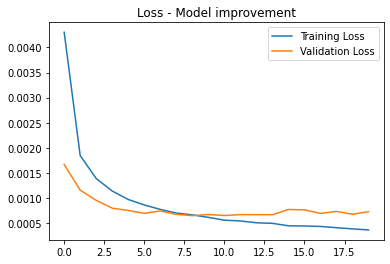

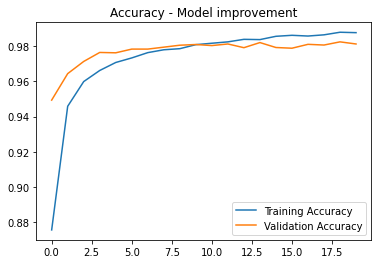


ACCURACY and LOSS after model improvement
Validation accuracy: 98.11%  - Validation loss: 0.00073
9811/10000


In [11]:
## YOUR CODE HERE ##

#MODEL IMPROVEMENT - Dropout to reduce overfitting
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 100)
        self.fc3 = nn.Linear(100, 10)
        # Dropout
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.activation(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Instantiate the model
net = Net()
print(net)

# Choose an optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.CrossEntropyLoss()


num_epochs = 20
train_loss_history = list()
train_accuracy_history=list()

val_loss_history = list()
val_accuracy_history=list()

for epoch in range(num_epochs):
    net = net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        optimizer.zero_grad()
        outputs =  net(inputs)
        loss =  criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)#check result,preds are index of row(label)
        train_correct += (preds == labels).sum().item()#add all True

        train_loss += loss.item()#errors
    print(f'Epoch {epoch + 1} training accuracy: {100*train_correct/len(train_loader.dataset):.2f}% training loss: {train_loss/len(train_loader.dataset):.5f}')
    #print(f'{train_correct}/{len(train_loader.dataset)}')
    train_loss_history.append(train_loss/len(train_loader.dataset))
    train_accuracy_history.append(train_correct/len(train_loader.dataset))
    
    val_loss = 0.0
    val_correct = 0
    net = net.eval()
    for i, data in enumerate(test_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).sum().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {100*val_correct/len(test_loader.dataset):.2f}% validation loss: {val_loss/len(test_loader.dataset):.5f}')
    #print(f'{val_correct}/{len(test_loader.dataset)}')
    val_loss_history.append(val_loss/len(test_loader.dataset))
    val_accuracy_history.append(val_correct/len(test_loader.dataset))
    
    
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.title("Loss - Model improvement")
plt.legend()
plt.show()

plt.plot(train_accuracy_history, label="Training Accuracy")
plt.plot(val_accuracy_history, label="Validation Accuracy")
plt.title("Accuracy - Model improvement")
plt.legend()
plt.show()


val_correct = 0
val_loss = 0.0

for i, data in enumerate(test_loader):
    inputs, labels = data
    net = net.eval()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print('')
print("ACCURACY and LOSS after model improvement")
print(f'Validation accuracy: {100*val_correct/len(test_loader.dataset):.2f}%  - Validation loss: {val_loss/len(test_loader.dataset):.5f}')
print(f'{val_correct}/{len(test_loader.dataset)}')

## Saving your model
Using `torch.save`, save your model for future loading.

In [12]:
## YOUR CODE HERE ##
#torch.save(net,'/Users/raffaelepepe/Desktop/DeepLearning_Udacity/project1/mnist_model') 
torch.save(net,'mnist_model') 